*January 1 2025*

# GOAL: DESIGNING A FEEDFORWARD NEURAL NETWORK

# Objective

Building a classification model using neural networks to predict a student's chances of admission to UCLA.

## **Data dictionary**
------------------------------

The dataset comprises essential features for applying to master's programs. The features included are:

* GRE Scores: (up to 340)
* TOEFL Scores: (up to 120)
* University Rating: Indicates graduation ranking (1 to 5)
* Statement of Purpose Strength: (1 to 5)
* Letter of Recommendation Strength: (1 to 5)
* GPA: (1 to 10)
* Research Experience: (0 or 1)
* Admission Probability: (from 0 to 1)

# Loading libraries and the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Importing the dataset
data = pd.read_csv('Admission_Predict.csv')

In [ ]:
#checking the top five of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#checking the down five of the data
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


Observations:
* The target variable is the chance of Admit.
* To fulfill the classification task, I will convert the target variable into categorical using a .80% threshold.
* If the chance of admit is more than 80%, then Admit would be 1(i.e., yes) otherwise, it would be 0(i.e., no).


In [ ]:
# Converting the target variable into a categorical variable

data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)

Now that the new variable **'Admit'** is created, the **Chance of Admit** column can be removed. The **Serial No** column can also be removed as it will not add value to the analysis.

In [ ]:
# Dropping the two columns
data = data.drop(['Serial No.', 'Chance of Admit '],axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


## **Data Preparation**

This dataset comprises both numerical and categorical variables, which require preprocessing before inputting them into the neural network. The preprocessing steps I will undertake include one-hot encoding for categorical variables and scaling for numerical variables.

It is essential to split the dataset into training and test sets prior to scaling the numerical variables and to perform the scaling separately for each set. Failing to do so could result in data leakage, where information from the test set unintentionally influences the training set, ultimately leading to an inflated sense of model performance. Avoiding data leakage is crucial in ensuring the validity of the model's evaluation.

In [ ]:
features = data.drop(['Admit'], axis=1)

target = data['Admit']

Now, I will divide the dataset into training and test sets. To do this, I will extract and store all the independent variables in a **feature** variable. The **target** variable **Admit** will be stored in a variable called target. These two variables will divide the main dataset into training and test sets.

In [ ]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

Scaling of numerical variables.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Here, I am passing all the features (numerical and categorical). That's okay, as the min-max scaler will not change the values of categorical variables.
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# **Building the Neural Network models**
### **1. Architecture **

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Resetting the backend. This is necessary for cleaning the memory of temporal variables.
from tensorflow.keras import backend
backend.clear_session()

The current architecture model_1 has two hidden layers, the first one with 16 neurons and the second with 32 with ReLU activation function.

In [ ]:
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(7,)))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))


In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Before training, I will deploy some lines of code to measure the training time required by this architecture.

import time
start_time = time.time()

history_1 = model_1.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
12/12 - 2s - loss: 0.6722 - accuracy: 0.7278 - val_loss: 0.7330 - val_accuracy: 0.5750 - 2s/epoch - 145ms/step
Epoch 2/100
12/12 - 0s - loss: 0.6568 - accuracy: 0.7278 - val_loss: 0.7283 - val_accuracy: 0.5750 - 17ms/epoch - 1ms/step
Epoch 3/100
12/12 - 0s - loss: 0.6441 - accuracy: 0.7278 - val_loss: 0.7250 - val_accuracy: 0.5750 - 17ms/epoch - 1ms/step
Epoch 4/100
12/12 - 0s - loss: 0.6324 - accuracy: 0.7278 - val_loss: 0.7164 - val_accuracy: 0.5750 - 17ms/epoch - 1ms/step
Epoch 5/100
12/12 - 0s - loss: 0.6215 - accuracy: 0.7278 - val_loss: 0.7068 - val_accuracy: 0.5750 - 16ms/epoch - 1ms/step
Epoch 6/100
12/12 - 0s - loss: 0.6120 - accuracy: 0.7278 - val_loss: 0.7026 - val_accuracy: 0.5750 - 17ms/epoch - 1ms/step
Epoch 7/100
12/12 - 0s - loss: 0.5960 - accuracy: 0.7278 - val_loss: 0.6782 - val_accuracy: 0.5750 - 17ms/epoch - 1ms/step
Epoch 8/100
12/12 - 0s - loss: 0.5759 - accuracy: 0.7278 - val_loss: 0.6621 - val_accuracy: 0.5750 - 18ms/epoch - 2ms/step
Epoch 9/100
12/1

The number of parameters to estimate is 705—total training time: 3.70 seconds.

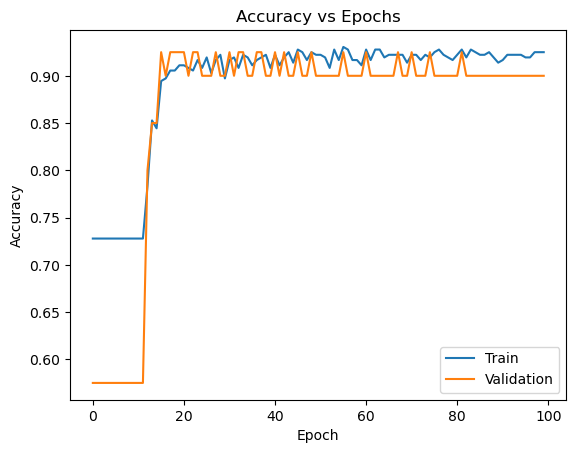

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The graphical representation of the neural network Model_1

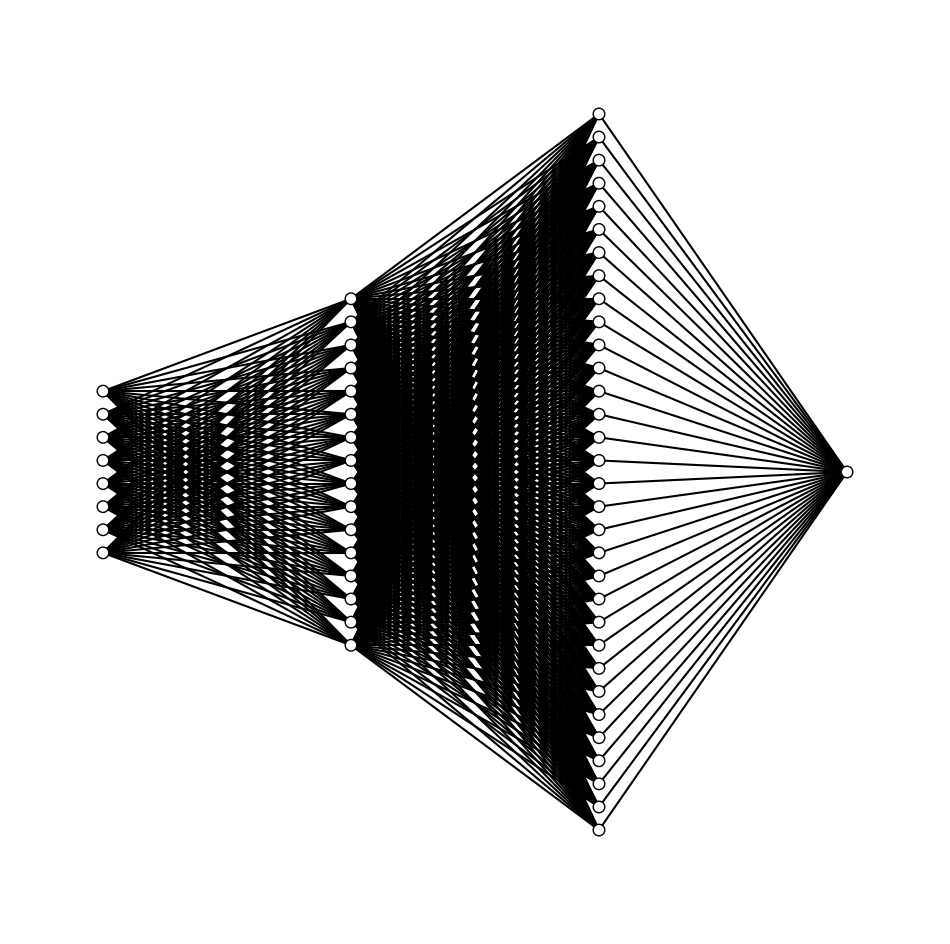

In [ ]:
# This code snipplet runs a personalized function that will "draw" the architecture
# developed.

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of the model
layer_sizes = [8, 16, 32, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()



 Calculating the test set's accuracy and constructing a confusion matrix and a classification report.

In [ ]:
model_1.evaluate(X_test_normalized, y_test, verbose = 1)
model_1_test_pred = np.round(model_1.predict(X_test_normalized))

4/4 [==============================] - 0s 565us/step


Results for model_1 TEST
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.93      0.93      0.93        27

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



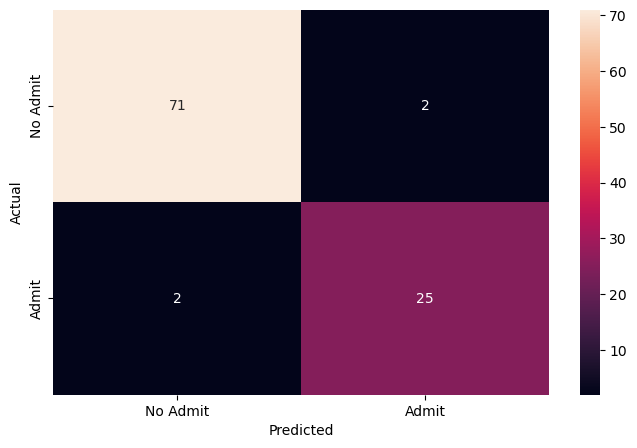

In [ ]:
print('======================================================================================================================')
print('Results for model_1 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_1_test_pred))
cm = confusion_matrix(y_test, model_1_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***The Modify model_1*** (***model_2***)

With the modified_2 model, I will develop an architecture of six hidden layers: the first with 64, the second with 32, the third and fourth with 64, and the fifth and sixth with 256 and ReLU activation functions.

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Resetting the backend. This is necessary for cleaning the memory of temporal variables.
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_shape=(7,)))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))


In [ ]:
model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 2

Now, I will train this model using 100 epochs.

In [ ]:
# Before training, I will deploy some lines of code to measure the training time required by this architecture.

import time
start_time = time.time()

history_2 = model_2.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
12/12 - 1s - loss: 0.6461 - accuracy: 0.7167 - val_loss: 0.7358 - val_accuracy: 0.5750 - 896ms/epoch - 75ms/step
Epoch 2/100
12/12 - 0s - loss: 0.5558 - accuracy: 0.7278 - val_loss: 0.6280 - val_accuracy: 0.5750 - 28ms/epoch - 2ms/step
Epoch 3/100
12/12 - 0s - loss: 0.4458 - accuracy: 0.7500 - val_loss: 0.5017 - val_accuracy: 0.9000 - 29ms/epoch - 2ms/step
Epoch 4/100
12/12 - 0s - loss: 0.3721 - accuracy: 0.8861 - val_loss: 0.3731 - val_accuracy: 0.9250 - 29ms/epoch - 2ms/step
Epoch 5/100
12/12 - 0s - loss: 0.2780 - accuracy: 0.9083 - val_loss: 0.2725 - val_accuracy: 0.8750 - 26ms/epoch - 2ms/step
Epoch 6/100
12/12 - 0s - loss: 0.2645 - accuracy: 0.8889 - val_loss: 0.2575 - val_accuracy: 0.9000 - 23ms/epoch - 2ms/step
Epoch 7/100
12/12 - 0s - loss: 0.2142 - accuracy: 0.9167 - val_loss: 0.2341 - val_accuracy: 0.9000 - 25ms/epoch - 2ms/step
Epoch 8/100
12/12 - 0s - loss: 0.1972 - accuracy: 0.9139 - val_loss: 0.2415 - val_accuracy: 0.9000 - 24ms/epoch - 2ms/step
Epoch 9/100
12

The number of parameters to estimate is 91553—total training time: 4.10 seconds.

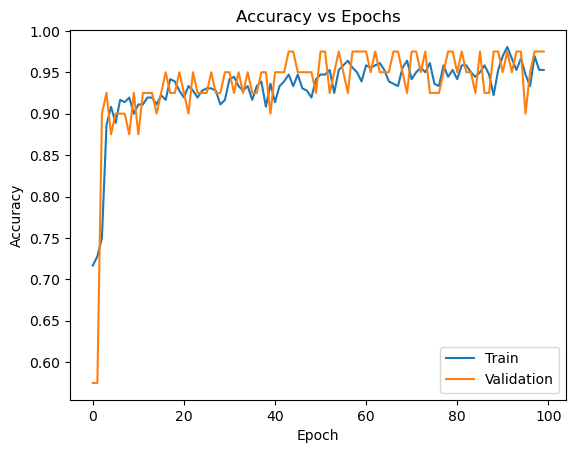

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The graphical representation of the neural network Model_2

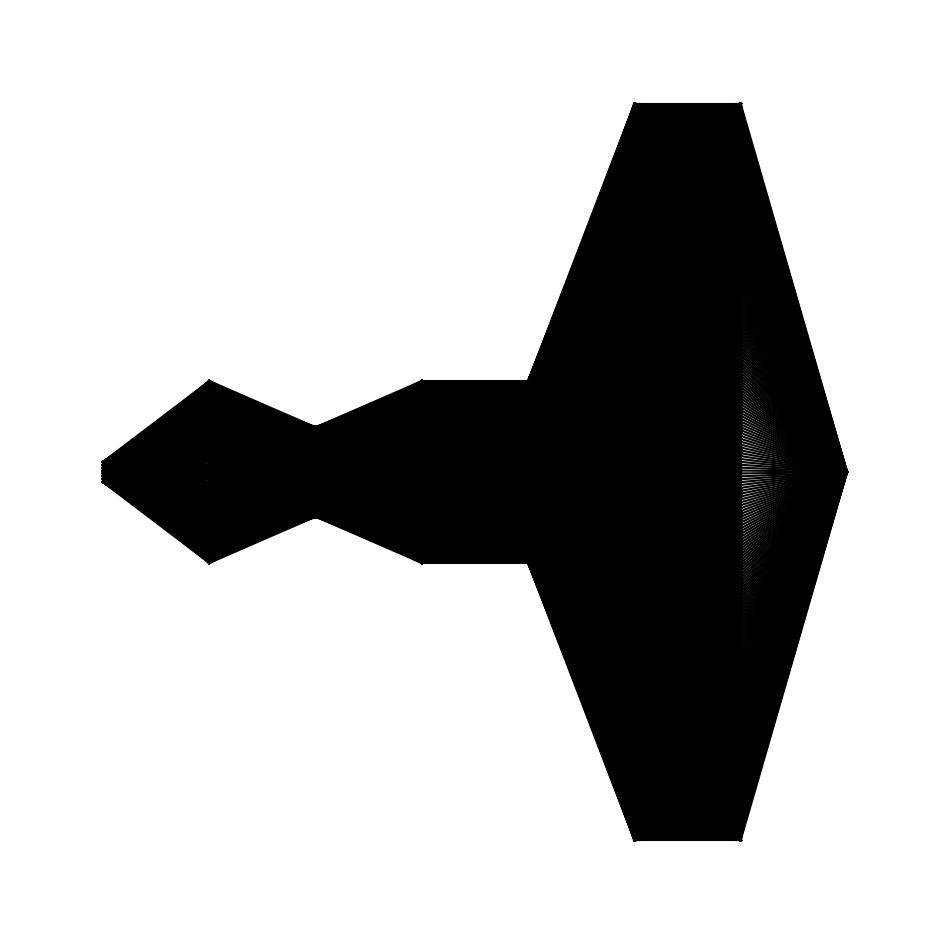

In [ ]:
# Drawing the architecture

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of the model
layer_sizes = [8, 64, 32, 64, 64, 256, 256, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()



Calculating the test set's accuracy and constructing a confusion matrix and a classification report.

In [ ]:
model_2.evaluate(X_test_normalized, y_test, verbose = 1)
model_2_test_pred = np.round(model_2.predict(X_test_normalized))

4/4 [==============================] - 0s 614us/step


Results for model_1 TEST
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.96      1.00      0.98        27

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



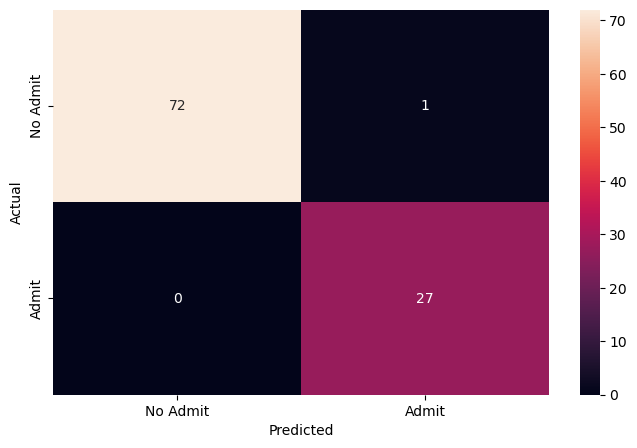

In [ ]:
print('======================================================================================================================')
print('Results for model_1 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_2_test_pred))
cm = confusion_matrix(y_test, model_2_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**The Modify model_3** (***model_3***)

With the modified model_3, I will develop an architecture with one hidden layer containing 8 neurons and ReLU activation functions.

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning the memory of temporal variables.
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(8, activation='relu', input_shape=(7,)))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 64        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Before training, I will deploy some lines of code to measure the training time required by this architecture.

import time
start_time = time.time()

history_3 = model_3.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
12/12 - 0s - loss: 0.8487 - accuracy: 0.2722 - val_loss: 0.7051 - val_accuracy: 0.4250 - 266ms/epoch - 22ms/step
Epoch 2/100
12/12 - 0s - loss: 0.8055 - accuracy: 0.2722 - val_loss: 0.6889 - val_accuracy: 0.4500 - 14ms/epoch - 1ms/step
Epoch 3/100
12/12 - 0s - loss: 0.7703 - accuracy: 0.2806 - val_loss: 0.6786 - val_accuracy: 0.4500 - 15ms/epoch - 1ms/step
Epoch 4/100
12/12 - 0s - loss: 0.7421 - accuracy: 0.3278 - val_loss: 0.6732 - val_accuracy: 0.5500 - 16ms/epoch - 1ms/step
Epoch 5/100
12/12 - 0s - loss: 0.7205 - accuracy: 0.3861 - val_loss: 0.6717 - val_accuracy: 0.6750 - 16ms/epoch - 1ms/step
Epoch 6/100
12/12 - 0s - loss: 0.7059 - accuracy: 0.4917 - val_loss: 0.6720 - val_accuracy: 0.7250 - 17ms/epoch - 1ms/step
Epoch 7/100
12/12 - 0s - loss: 0.6917 - accuracy: 0.5333 - val_loss: 0.6720 - val_accuracy: 0.6500 - 23ms/epoch - 2ms/step
Epoch 8/100
12/12 - 0s - loss: 0.6821 - accuracy: 0.5139 - val_loss: 0.6733 - val_accuracy: 0.4750 - 16ms/epoch - 1ms/step
Epoch 9/100
12

The number of parameters to estimate is 73—total training time: 2.02 seconds.

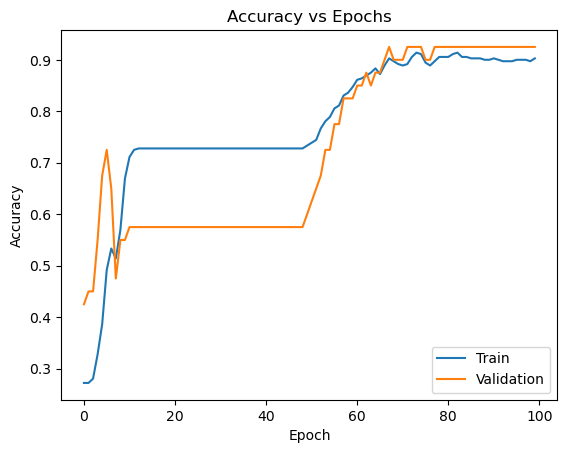

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The graphical representation of the neural network Model_3

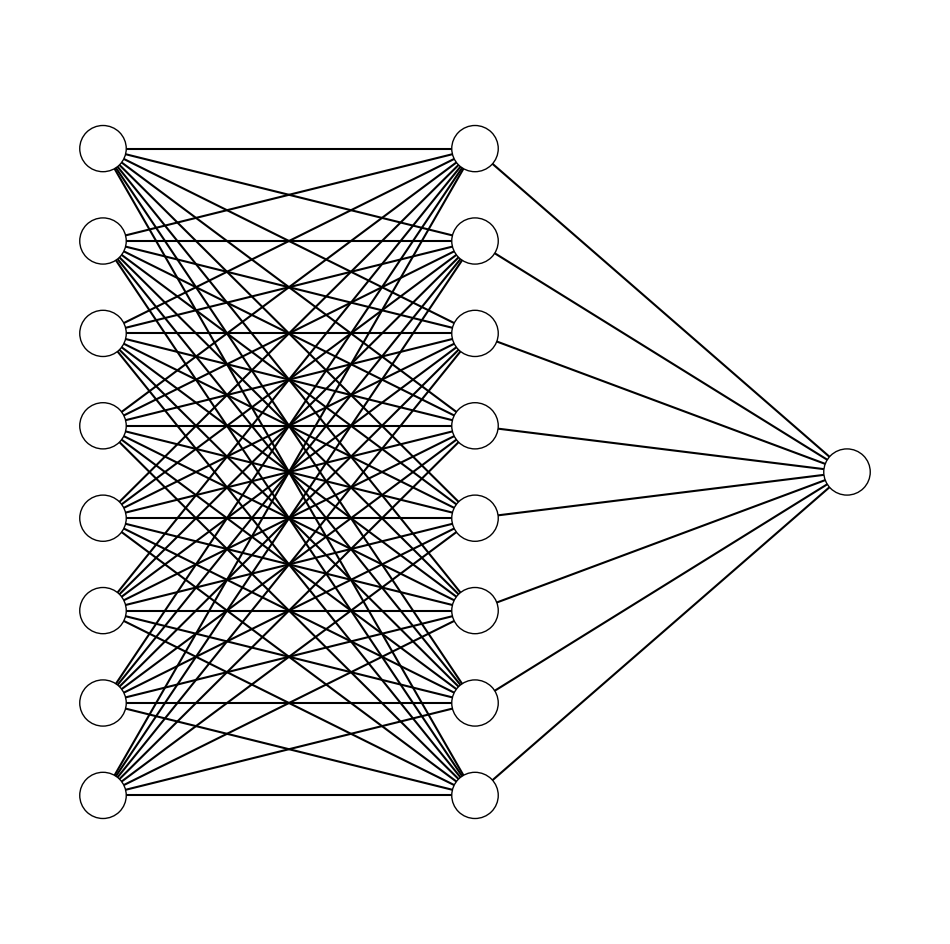

In [ ]:
# This code snipplet runs a personalized function that will "draw" the architecture
# developed.

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of your model
layer_sizes = [8, 8, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()


Calculating the test set's accuracy and constructing a confusion matrix and a classification report.

In [ ]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)
model_3_test_pred = np.round(model_1.predict(X_test_normalized))

4/4 [==============================] - 0s 651us/step


Results for model_1 TEST
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.93      0.93      0.93        27

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



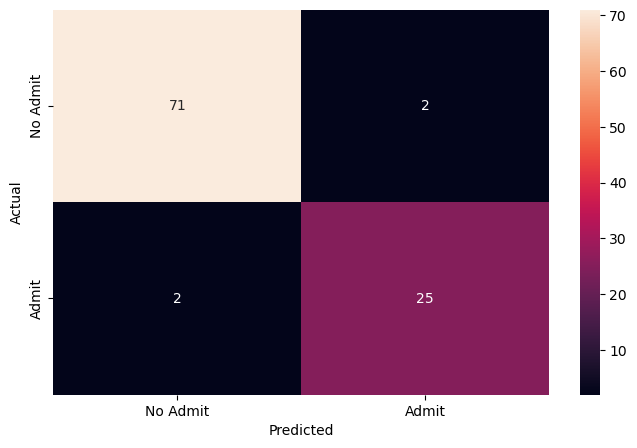

In [ ]:
print('======================================================================================================================')
print('Results for model_1 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_3_test_pred))
cm = confusion_matrix(y_test, model_3_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Thank you